In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')

In [26]:
df1 = pd.read_csv('C:/Users/User/python02/광진/주정차단속현황.csv',encoding='cp949')

In [2]:
cctv = pd.read_csv('C:/Users/User/python02/광진/서울시광진구불법주정차위반단속CCTV위치정보.csv',encoding='cp949')
df = pd.read_csv('C:/Users/User/python02/광진/서울특별시 광진구_주정차단속현황.csv',encoding='cp949')
pp = pd.read_csv('C:/Users/User/python02/광진/서울특별시 광진구_연령별인구현황_20221231.csv',encoding='cp949')

In [3]:
# 결측치 제거 -> 고작 6행
df = df.dropna()

#병합을 위한 컬럼이름 변경

cctv = cctv.rename(columns={'단속지점명':'단속장소'}) #

# 띄어쓰기 제거 -> 두 데이터간 값 달라서
df["단속장소"] = df["단속장소"].str.replace(' ','') 
cctv["단속장소"] = cctv["단속장소"].str.replace(' ','')

# cctv 설치 장소 단속 건 세기 위해 병합
dfcctv= pd.merge(cctv, df, on = '단속장소', how = 'left', indicator=True)

# 결측치 확인 및 제거
dfcctv.isnull().sum()

dfcctv = dfcctv.dropna()

# to 날짜 타입

dfcctv['단속일시'] = pd.to_datetime(dfcctv['단속일시'], format='%Y-%m-%d %H:%M:%S')

cctv["단속장소"] = cctv["단속장소"].str.replace(' ','')

In [46]:
df1 = df.dropna()
df1['단속일시'] = pd.to_datetime(df1['단속일시'], format='%Y-%m-%d %H:%M:%S')
# 년도와 월별 단속 건수 계산
monthly_counts1 = df1.groupby([df1['단속일시'].dt.year.astype(str), df1['단속일시'].dt.month.astype(str)]).size()

# 시각화
plt.figure(figsize=(30, 20))
plt.plot(monthly_counts1.index.astype(str), monthly_counts1)
plt.xticks(rotation=45, ha='right')
plt.xlabel('X-axis label', fontsize=32) # x축 레이블 폰트 크기 변경
plt.ylabel('Y-axis label', fontsize=32) # y축 레이블 폰트 크기 변경
plt.tick_params(axis='both', labelsize=30) # 축 눈금 레이블 폰트 크기 변경
plt.title('Quarterly Inspection Counts')
plt.show()


TypeError: Setting a MultiIndex dtype to anything other than object is not supported

<Figure size 3000x2000 with 0 Axes>

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


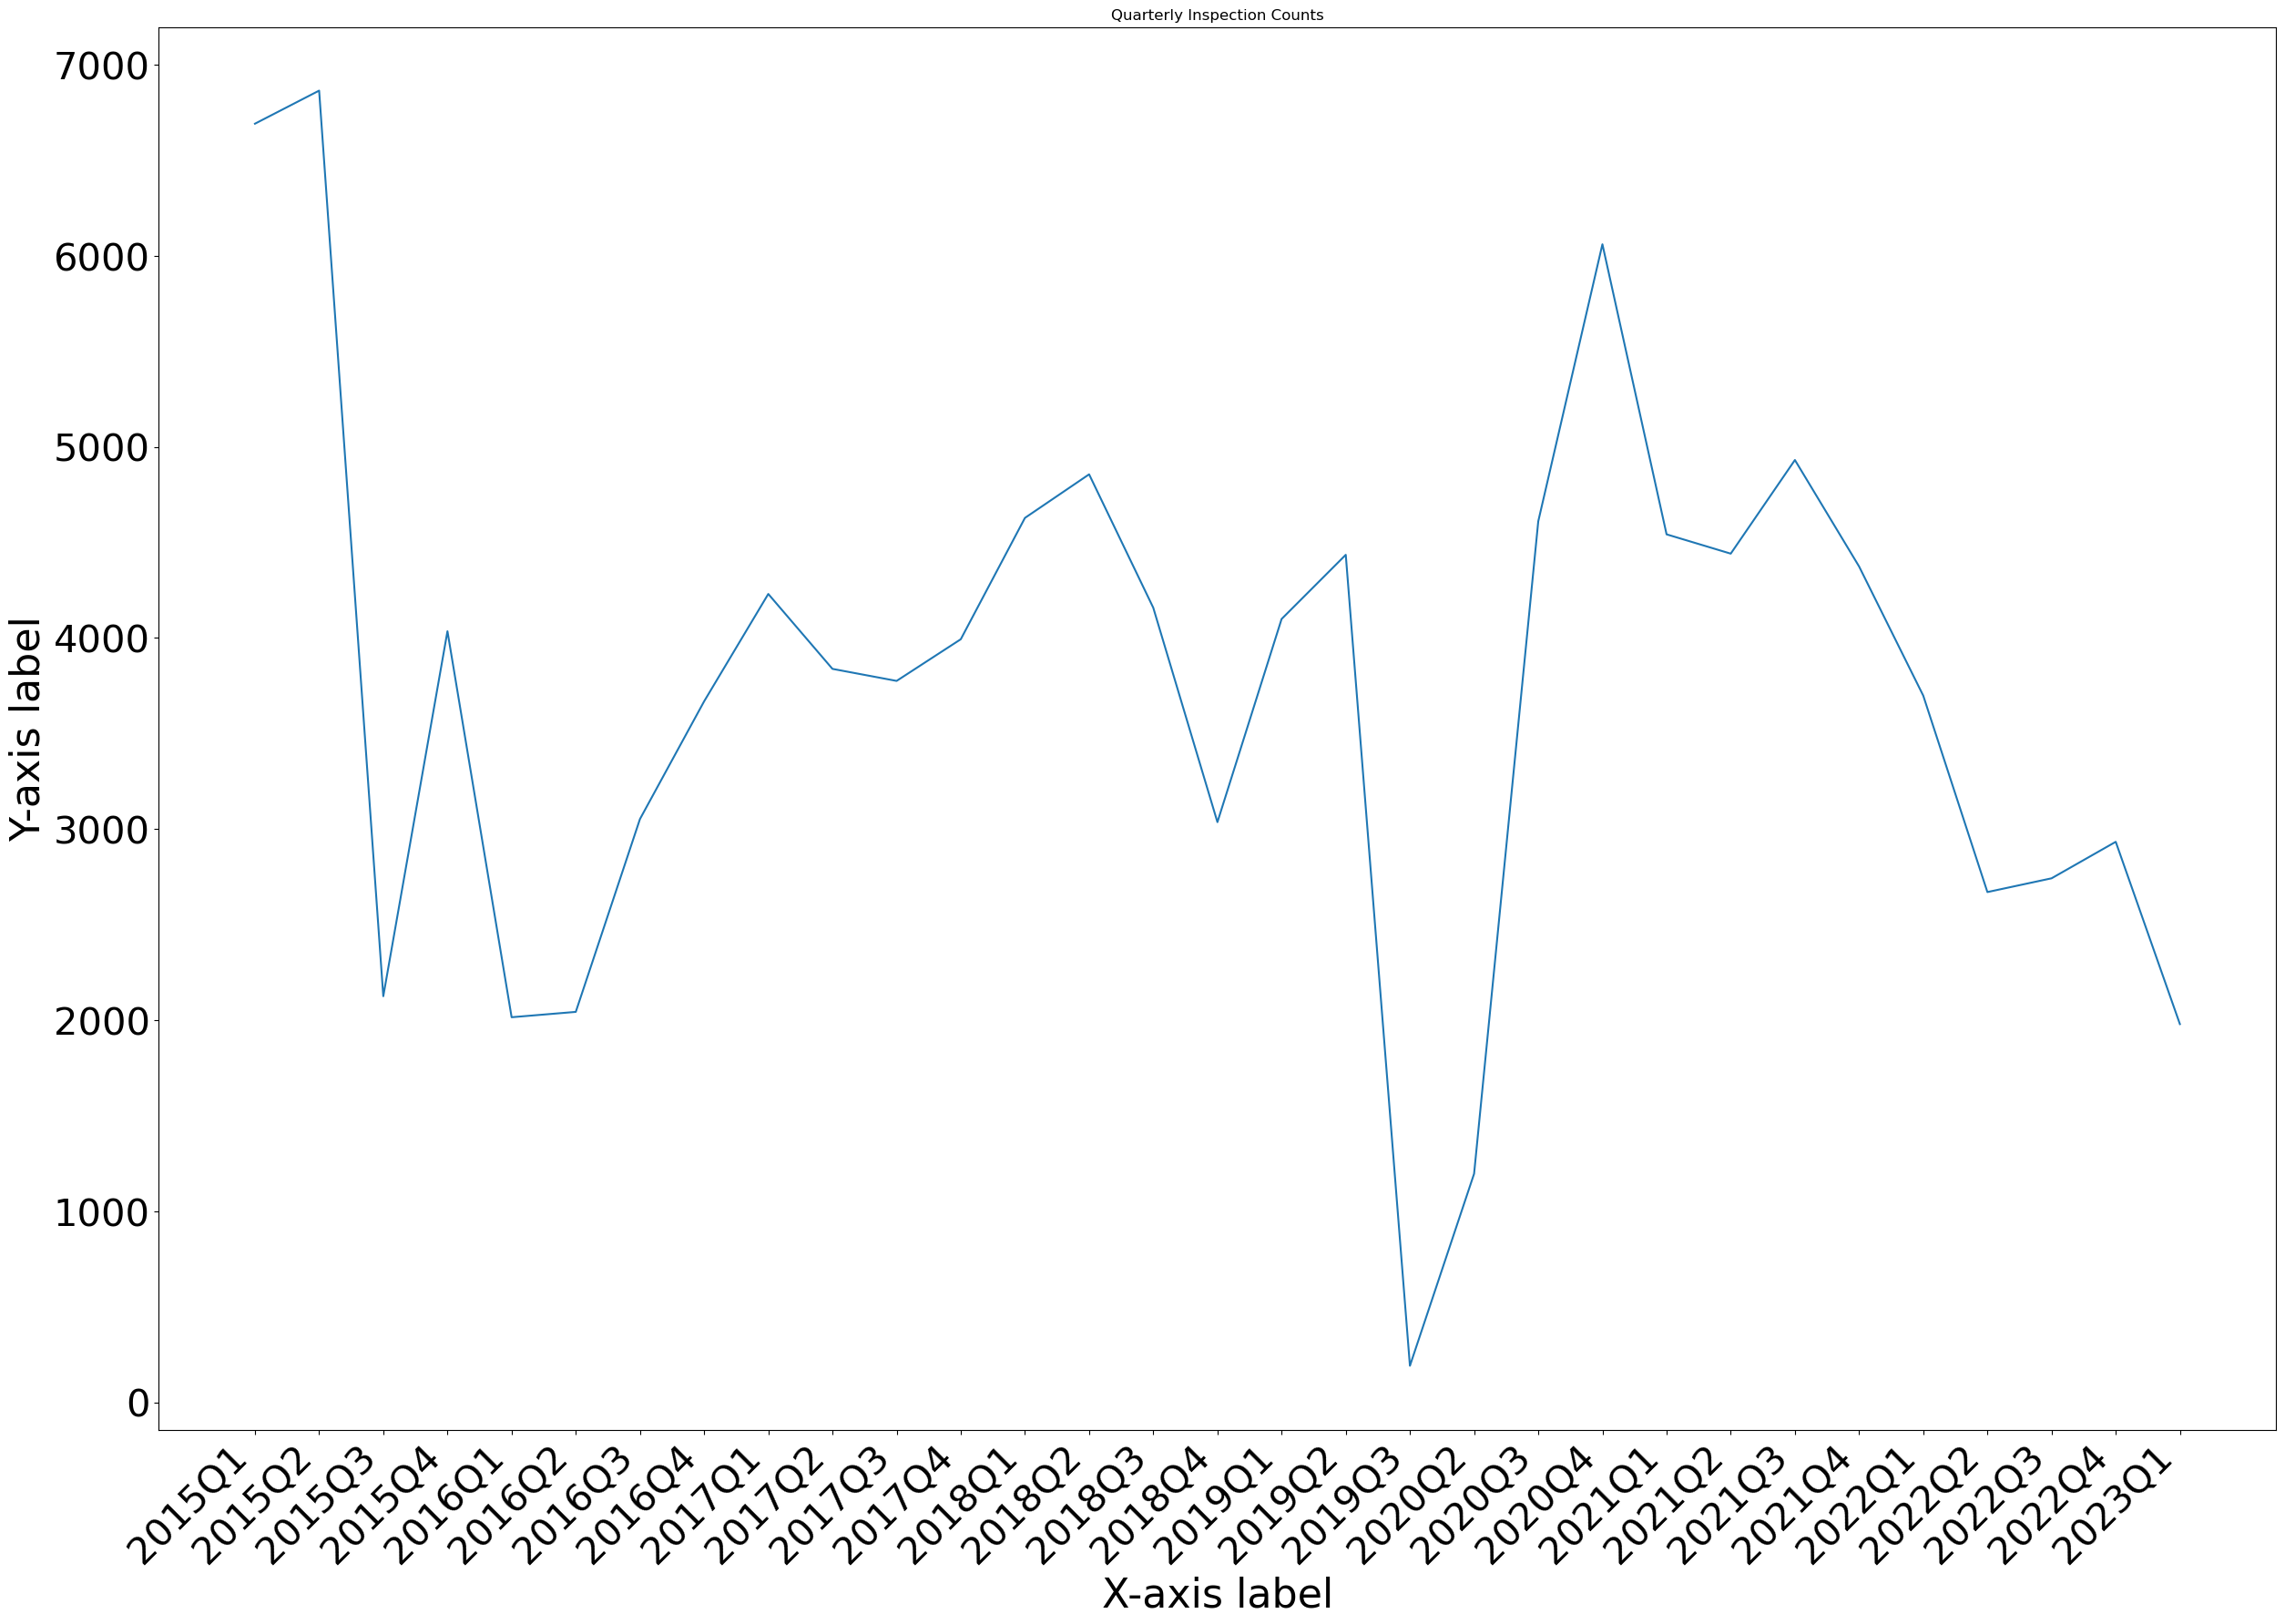

In [14]:
# 년도와 월별 단속 건수 계산
monthly_counts = dfcctv.groupby(dfcctv['단속일시'].dt.to_period('Q')).size()

# 시각화
plt.figure(figsize=(30, 20))
plt.plot(monthly_counts.index.astype(str), monthly_counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel('X-axis label', fontsize=32) # x축 레이블 폰트 크기 변경
plt.ylabel('Y-axis label', fontsize=32) # y축 레이블 폰트 크기 변경
plt.tick_params(axis='both', labelsize=30) # 축 눈금 레이블 폰트 크기 변경
plt.title('Quarterly Inspection Counts')
plt.show()

In [ ]:
# 년도별/월별 합계 계산
year_month_total = dfcctv.groupby( dfcctv['단속일시'].dt.month)['단속원금'].sum().reset_index()

In [ ]:
# 년도별 금액 합계 계산
yearly_total = dfcctv.groupby(dfcctv['단속일시'].dt.year)['단속원금'].sum().reset_index()

In [ ]:

plt.plot(year_month_total['단속일시'], year_month_total['단속원금'])

plt.figure(figsize=(30,6))
plt.xlabel('단속일시')
plt.ylabel('단속원금 합계')
plt.xticks(rotation=45)
plt.title('5년 단속금 추이')
plt.show()